In [13]:
import cv2
import os
import re
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# 读取图片
image_path = './dataset/background.jpeg'
img = cv2.imread(image_path)

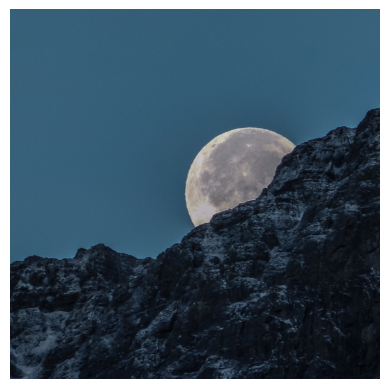

In [5]:
# 将图像编码从BGR转换为RGB，因为matplotlib期望RGB格式
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
# 使用matplotlib显示图像
plt.imshow(img_rgb, cmap='gray')
plt.axis('off')  # 不显示坐标轴
plt.show()

In [32]:
root_dir = '../dataset/total_data'
output_root = './output'

In [33]:
# 确保输出根目录存在
os.makedirs(output_root, exist_ok=True)

In [34]:
for file_name in os.listdir(root_dir):
    if os.path.isdir(os.path.join(root_dir, file_name)):  # 判断是否为文件夹  
         # 获取漫画名称   
        result = re.match(r'^[^\d]*', file_name) # 匹配字母和空格，直到遇到数字
        if result:
            comics_name = result.group(0).strip()  # strip()移除首尾空格
        print("漫画名称：", comics_name)
        # 获取文件夹路径
        folder_path = os.path.join(root_dir, file_name)
        
        # 构建PicsFolds路径
        pics_folds_path = os.path.join(folder_path, 'PicsFolds')
        
        for chapter_folder in os.listdir(pics_folds_path):
            # 获取章节数值
            pattern = re.compile(r'^\d+')  # 匹配开头的连续数字
            match = pattern.match(chapter_folder)
            if match:
                chapter_num = match.group()
            print("章节数：", chapter_num)
            # 获取章节文件夹路径
            chapter_folder_path = os.path.join(pics_folds_path, chapter_folder)
            
            # 遍历章节文件夹中的所有图片
            for image_file in os.listdir(chapter_folder_path):
                if not image_file.lower().endswith(('.jpg', '.jpeg')):
                    continue
                # 获取页数
                match = re.search(r'\((\d+)\)', image_file)
                if match:
                    page_num = match.group(1)  # group(1)获取括号内的内容
                match = re.search(r'-(\d+)', image_file)
                if match:
                    page_num = match.group(1)  # group(1)获取"-"后的内容
                print("页数:", page_num)
                
                # 构建输入图片完整路径
                input_image_path = os.path.join(chapter_folder_path, image_file)
                
                # 构建输出路径（output_root/comics_name/chapter_num）
                output_folder_path = os.path.join(
                    output_root, 
                    comics_name,  
                    chapter_num
                )
                
                # 确保输出目录存在,若不存在,则创建目录
                os.makedirs(output_folder_path, exist_ok=True)
                
                # 构建输出图片路径（可以修改输出文件名，这里保持原名）
                output_image_path = os.path.join(
                    output_folder_path, 
                    f"result_{page_num}.jpg"  # 添加result_前缀以示区别
                )

漫画名称： BattleThroughtheHeaven
章节数： 001
页数: 01
章节数： 002
页数: 1
章节数： 003
页数: 04
漫画名称： Dragon
章节数： 001
页数: 01
章节数： 002
页数: 1
章节数： 003
页数: 04


In [24]:
output_image_path

'./output\\Dragon\\003\\result_04.jpg'

In [14]:
# 提取漫画名称
text = 'BattleThroughtheHeaven 001-54'

# 匹配字母和空格，直到遇到数字
result = re.match(r'^[A-Za-z\s]+', text)
if result:
    extracted = result.group(0).strip()  # strip()移除首尾空格
    print(extracted)  # 输出: "ABC tou"

BattleThroughtheHeaven


In [26]:
def process_directory_structure(root_dir, output_root):
    """
    遍历目录结构并处理图片
    """
    # 确保输出根目录存在
    os.makedirs(output_root, exist_ok=True)
    
    # 遍历root_dir下的所有漫画文件夹
    for name_folder in os.listdir(root_dir):
        # 获取漫画名称   
        result = re.match(r'^[A-Za-z\s]+', name_folder) # 匹配字母和空格，直到遇到数字
        if result:
            comics_name = result.group(0).strip()  # strip()移除首尾空格
        print("漫画名称：", comics_name)
        # 获取文件夹路径
        folder_path = os.path.join(root_dir, name_folder)
        if not os.path.isdir(folder_path): # 忽视非文件夹文件
            continue
        
        # 构建PicsFolds路径
        pics_folds_path = os.path.join(folder_path, 'PicsFolds')
        if not os.path.exists(pics_folds_path):
            continue
        
        # 遍历PicsFolds下的所有章节文件夹
        for chapter_folder in os.listdir(pics_folds_path):
            # 获取章节数值
            pattern = re.compile(r'^\d+')  # 匹配开头的连续数字
            match = pattern.match(chapter_folder)
            if match:
                chapter_num = match.group()
            print("章节数：", chapter_num)
            # 获取章节文件夹路径
            chapter_folder_path = os.path.join(pics_folds_path, chapter_folder)
            if not os.path.isdir(chapter_folder_path):
                continue
            
            # 遍历章节文件夹中的所有图片
            for image_file in os.listdir(chapter_folder_path):
                if not image_file.lower().endswith(('.jpg', '.jpeg')):
                    continue
                    
                # 获取页数
                match = re.search(r'\((\d+)\)', image_file)
                if match:
                    page_num = match.group(1)  # group(1)获取括号内的内容
                match = re.search(r'-(\d+)', image_file)
                if match:
                    page_num = match.group(1)  # group(1)获取"-"后的内容
                print("页数:", page_num)
                
                # 构建输入图片完整路径
                input_image_path = os.path.join(chapter_folder_path, image_file)
                
                # 构建输出路径（output_root/comics_name/chapter_num）
                output_folder_path = os.path.join(
                    output_root, 
                    comics_name,  
                    chapter_num
                )
                
                # 确保输出目录存在,若不存在,则创建目录
                os.makedirs(output_folder_path, exist_ok=True)
                
                # 构建输出图片路径（可以修改输出文件名，这里保持原名）
                output_image_path = os.path.join(
                    output_folder_path, 
                    f"result_{page_num}.jpg"  # 添加result_前缀以示区别
                )
                
                # 处理图片
                # process_image(input_image_path, output_image_path)
                print(input_image_path)
                print(output_image_path)

In [30]:
input_root = '..\\dataset\\total_data'  # 输入根目录
output_root = '.\\output'  # 输出根目录
    
# 开始处理
process_directory_structure(input_root, output_root)
print("所有图片处理完成！")

漫画名称： BattleThroughtheHeaven
章节数： 001
页数: 01
..\dataset\total_data\BattleThroughtheHeaven 001-54\PicsFolds\001\001-01.jpg
.\output\BattleThroughtheHeaven\001\result_01.jpg
章节数： 002
页数: 1
..\dataset\total_data\BattleThroughtheHeaven 001-54\PicsFolds\002.pdf\002(1).jpeg
.\output\BattleThroughtheHeaven\002\result_1.jpg
章节数： 003
页数: 04
..\dataset\total_data\BattleThroughtheHeaven 001-54\PicsFolds\003.PDF\003-04.jpg
.\output\BattleThroughtheHeaven\003\result_04.jpg
漫画名称： Dragon
章节数： 001
页数: 01
..\dataset\total_data\Dragon 002-089\PicsFolds\001\001-01.jpg
.\output\Dragon\001\result_01.jpg
章节数： 002
页数: 1
..\dataset\total_data\Dragon 002-089\PicsFolds\002.pdf\002(1).jpeg
.\output\Dragon\002\result_1.jpg
章节数： 003
页数: 04
..\dataset\total_data\Dragon 002-089\PicsFolds\003.PDF\003-04.jpg
.\output\Dragon\003\result_04.jpg
所有图片处理完成！
